In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# parameter settings

mu = 1/15
n_bev_init = 8000
rho = 0.1
t_session = 0.8   #h
t_service = 1   #h
d_average_curr = (9 + 5 + 6)/3 * 2
n_days_recharge = 6


In [3]:
n_cp_public = mu * n_bev_init
n_bev_public = rho * n_cp_public
n_bev_day_cp_public = n_bev_public / n_days_recharge

p_occupied = t_session / t_service

n_cp_available = np.log(0.6)/np.log(p_occupied)
detour_distance = n_cp_available * d_average_curr       # min

print('Number of charging points available: ', n_cp_available)
print('Detour distance: ', detour_distance)
print(p_occupied)
print(n_bev_day_cp_public)
print(d_average_curr)
print(n_cp_public)

Number of charging points available:  2.289224226994103
Detour distance:  30.522989693254708
0.8
8.888888888888891
13.333333333333334
533.3333333333334


In [4]:
area = 7243
population_density = 310

city_density = 6000

ratio_build_env = population_density/city_density
effective_area = area * ratio_build_env
effective_area = area
print(area, effective_area, ratio_build_env)

7243 7243 0.051666666666666666


In [5]:
nb_points_per_site_average = 2 * 1.4
nb_sites = n_cp_public/nb_points_per_site_average
d_arieal = (1/2) * np.sqrt(effective_area/nb_sites)
print(d_arieal)
print(d_arieal * (1/40) * 60, " min")
print(nb_sites)

3.0832511250302006
4.624876687545301  min
190.4761904761905


In [6]:
alpha = 8
detour_distance_abl = alpha * d_arieal
print(detour_distance_abl, d_arieal)
print(detour_distance_abl * (1/40) * 60, " min")

24.666009000241605 3.0832511250302006
36.99901350036241  min


## Creating densification reduction curves

C:\Users\simuser\AppData\Local\Temp\ipykernel_8664\3346904745.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  d_arieal = (1/2) * np.sqrt(effective_area/nb_sites_floor) * alpha


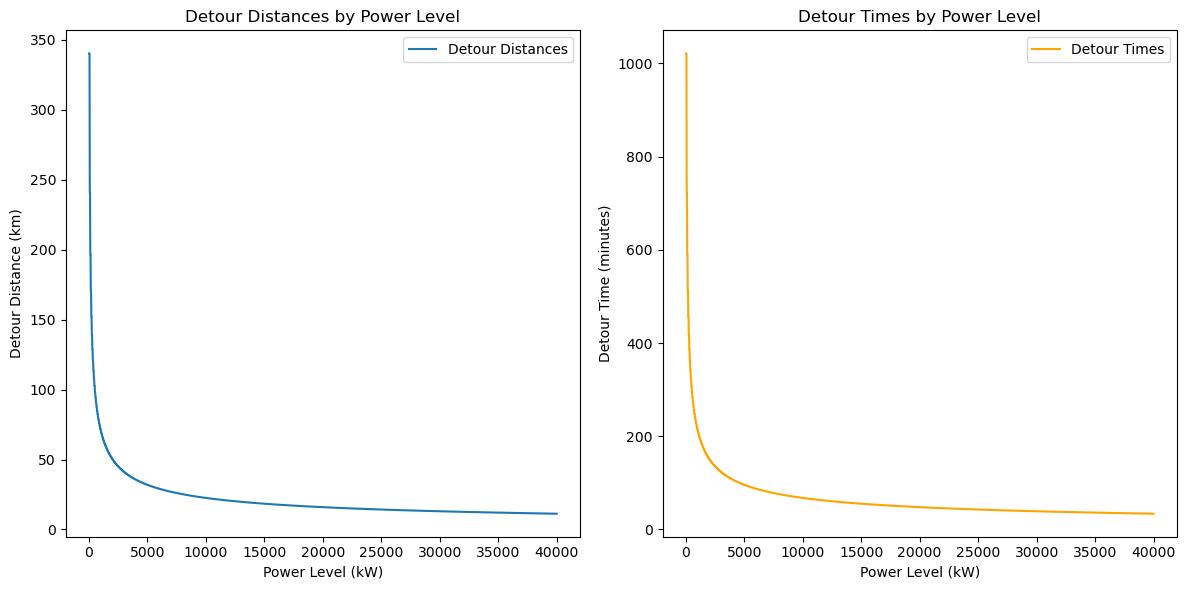

In [7]:
# First: Densification focused approach
detour_time_init = detour_distance
average_power = 22  # kW 
max_power = 40 * 1000
nb_points_per_site_average = 2
detour_distances = []
detour_times = []
power_levels = []
for power in np.arange(0, max_power, average_power):
    nb_points = power / average_power
    nb_sites = nb_points / nb_points_per_site_average
    nb_sites_floor = np.floor(nb_sites)
    d_arieal = (1/2) * np.sqrt(effective_area/nb_sites_floor) * alpha
    detour_distances.append(d_arieal)
    detour_times.append(d_arieal * (1/40) * 60 * 2)
    power_levels.append(power)


plt.figure(figsize=(12, 6))

# Plot detour distances by power level
plt.subplot(1, 2, 1)
plt.plot(power_levels, detour_distances, label='Detour Distances')
plt.xlabel('Power Level (kW)')
plt.ylabel('Detour Distance (km)')
plt.title('Detour Distances by Power Level')
plt.legend()

# Plot detour times by power level
plt.subplot(1, 2, 2)
plt.plot(power_levels, detour_times, label='Detour Times', color='orange')
plt.xlabel('Power Level (kW)')
plt.ylabel('Detour Time (minutes)')
plt.title('Detour Times by Power Level')
plt.legend()

plt.tight_layout()
plt.show()

140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140.4090909090909
140.9090909090909
141.4090909090909
141.9090909090909
142.4090909090909
142.9090909090909
143.4090909090909
143.9090909090909
144.4090909090909
144.9090909090909
145.4090909090909
145.9090909090909
146.4090909090909
146.9090909090909
147.4090909090909
147.9090909090909
148.4090909090909
148.9090909090909
149.4090909090909
149.9090909090909
150.4090909090909
150.9090909090909
151.4090909090909
151.9090909090909
152.4090909090909
152.9090909090909
153.4090909090909
153.9090909090909
154.4090909090909
154.9090909090909
155.4090909090909
155.9090909090909
156.4090909090909
156.909090

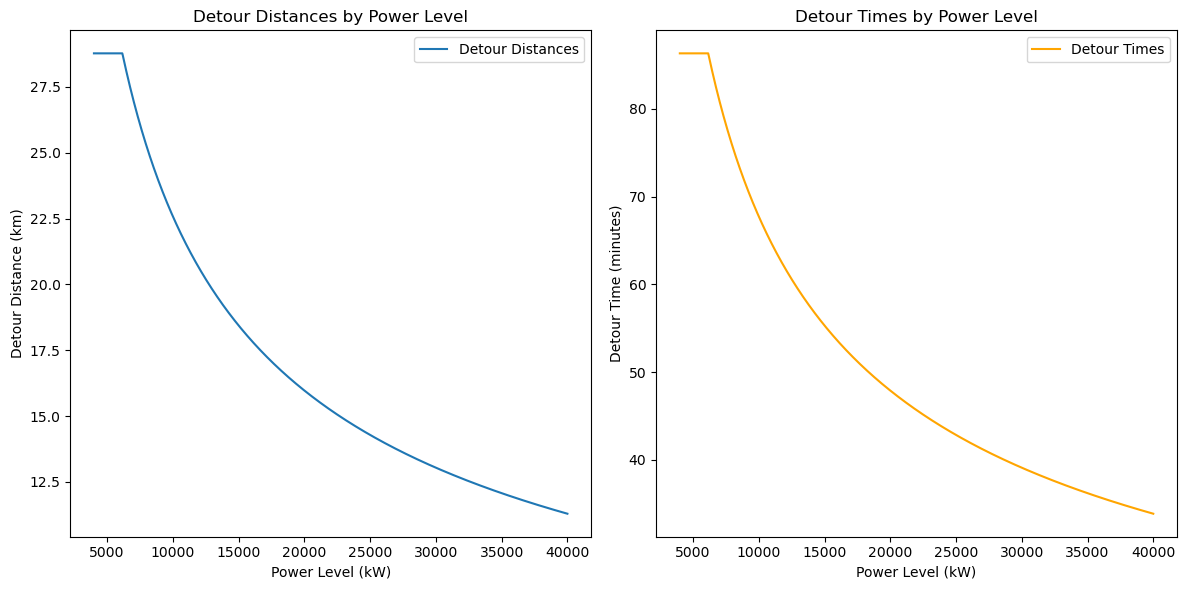

In [8]:
# todo introduce current charging infrastructure for intialization
current_power = n_cp_public * 15 / 2
current_nb_cs = 140
detour_time_init = detour_distance
average_power = 22  # kW 
max_power = 40 * 1000
nb_points_per_site_average = 2
detour_distances = []
detour_times = []
power_levels = []
for power in np.arange(current_power, max_power, average_power):
    # filling up charging stations
    nb_points = power / average_power
    nb_sites = nb_points / nb_points_per_site_average
    if nb_sites < current_nb_cs:
        nb_sites = current_nb_cs
    print(nb_sites)
    d_arieal = (1/2) * np.sqrt(effective_area/nb_sites) * alpha
    detour_distances.append(d_arieal)
    detour_times.append(d_arieal * (1/40) * 60 * 2)
    power_levels.append(power)

plt.figure(figsize=(12, 6))

# Plot detour distances by power level
plt.subplot(1, 2, 1)
plt.plot(power_levels, detour_distances, label='Detour Distances')
plt.xlabel('Power Level (kW)')
plt.ylabel('Detour Distance (km)')
plt.title('Detour Distances by Power Level')
plt.legend()

# Plot detour times by power level
plt.subplot(1, 2, 2)
plt.plot(power_levels, detour_times, label='Detour Times', color='orange')
plt.xlabel('Power Level (kW)')
plt.ylabel('Detour Time (minutes)')
plt.title('Detour Times by Power Level')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
def decreasing_detouring_time(nb_points_per_site_average):
    current_power = n_cp_public * 15 / 2
    current_nb_cs = 140
    detour_time_init = detour_distance
    average_power = 22  # kW 
    max_power = 100000
    speed = 40  # km/h
    detour_distances = []
    detour_times = []
    power_levels = []
    nb_sites_list = []
    detour_times_dic = {}
    alpha = 1.4
    for power in np.arange(current_power, max_power, 10):
        # filling up charging stations
        nb_points = power / average_power
        nb_sites = nb_points / nb_points_per_site_average
        if nb_sites < current_nb_cs:
            nb_sites = current_nb_cs
        nb_sites_floored = np.floor(nb_sites)
        d_arieal = (1/2) * np.sqrt(effective_area/nb_sites_floored) * alpha
        detour_distances.append(d_arieal)
        nb_sites_list.append(nb_sites_floored)
        detour_times.append(d_arieal * 60 * 2 *(1/speed))
        power_levels.append(power)
        detour_times_dic[power] =d_arieal * 60 * 2 *(1/speed)
    
    return detour_distances, detour_times, power_levels, detour_times_dic, nb_sites_list

In [47]:
def decreasing_detouring_time_by_area(nb_points_per_site_average, area, current_number_cs, current_power, average_power, current_nb_cs):
    max_power = 50000000
    detour_distances = []
    detour_times = []
    power_levels = []
    nb_sites_list = []
    detour_times_dic = {}
    alpha = 1.4
    speed = 25
    current_power = np.round(current_power, -1)
    for power in np.arange(0, max_power, 10):
        # filling up charging stations
        nb_points = power / average_power
        nb_sites = nb_points / nb_points_per_site_average
        if nb_sites < current_nb_cs:
            nb_sites = current_nb_cs
        nb_sites_floored = np.floor(nb_sites)
        d_arieal = (1/2) * np.sqrt(area/nb_sites_floored) * alpha
        detour_distances.append(d_arieal)
        nb_sites_list.append(nb_sites_floored)
        detour_times.append(d_arieal * (1/speed) * 60 * 2)
        power_levels.append(power)
        detour_times_dic[power] =d_arieal * (1/speed) * 60 * 2
    
    return detour_distances, detour_times, power_levels, detour_times_dic, nb_sites_list

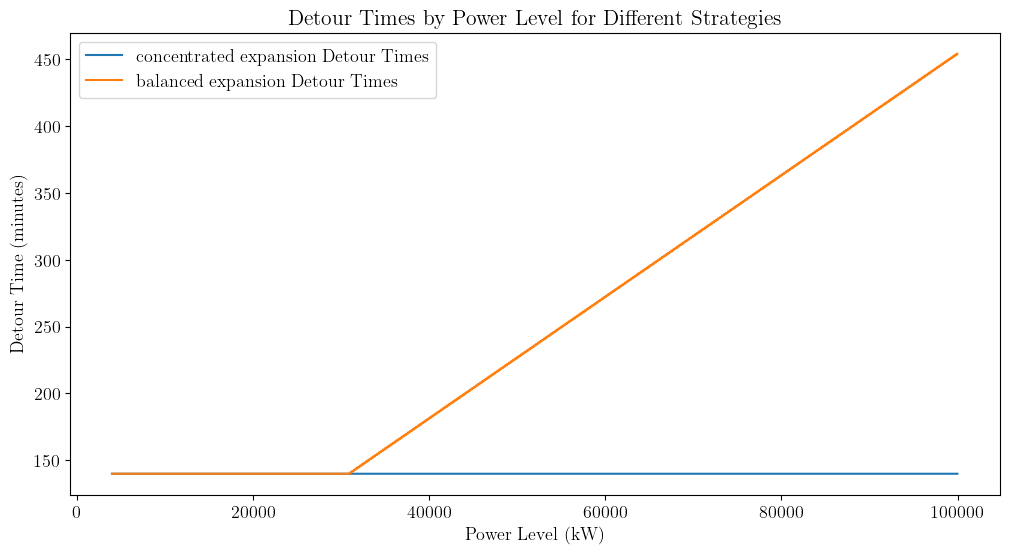

In [48]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Garamond",
    "font.size": 13,
})
nb_points_per_site = {"concentrated expansion": 40, "distributed expansion": 2, "balanced expansion": 10}
output = {}
for strategy in nb_points_per_site.keys():
    detour_distances, detour_times, power_levels, detour_times_dic, nb_sites_list = decreasing_detouring_time(nb_points_per_site[strategy])
    output[strategy] = {"detour_distances": detour_distances, "detour_times": detour_times, "power_levels": power_levels, "detour_times_dic": detour_times_dic, "nb_sites_list": nb_sites_list}

plt.figure(figsize=(12, 6))

# Plot detour times for different strategies
for strategy in output.keys():
    if not strategy == "distributed expansion":
        # plt.plot(output[strategy]["power_levels"], output[strategy]["detour_times"], label=f'{strategy} Detour Times')
        plt.plot(output[strategy]["power_levels"], output[strategy]["nb_sites_list"], label=f'{strategy} Detour Times')

plt.xlabel('Power Level (kW)')
plt.ylabel('Detour Time (minutes)')
plt.title('Detour Times by Power Level for Different Strategies')
plt.legend()
plt.show()




[np.float64(4000.0000000000005), np.float64(4010.0000000000005), np.float64(4020.0000000000005), np.float64(4030.0000000000005), np.float64(4040.0000000000005), np.float64(4050.0000000000005), np.float64(4060.0000000000005), np.float64(4070.0000000000005), np.float64(4080.0000000000005), np.float64(4090.0000000000005), np.float64(4100.0), np.float64(4110.0), np.float64(4120.0), np.float64(4130.0), np.float64(4140.0), np.float64(4150.0), np.float64(4160.0), np.float64(4170.0), np.float64(4180.0), np.float64(4190.0), np.float64(4200.0), np.float64(4210.0), np.float64(4220.0), np.float64(4230.0), np.float64(4240.0), np.float64(4250.0), np.float64(4260.0), np.float64(4270.0), np.float64(4280.0), np.float64(4290.0), np.float64(4300.0), np.float64(4310.0), np.float64(4320.0), np.float64(4330.0), np.float64(4340.0), np.float64(4350.0), np.float64(4360.0), np.float64(4370.0), np.float64(4380.0), np.float64(4390.0), np.float64(4400.0), np.float64(4410.0), np.float64(4420.0), np.float64(4430.0),

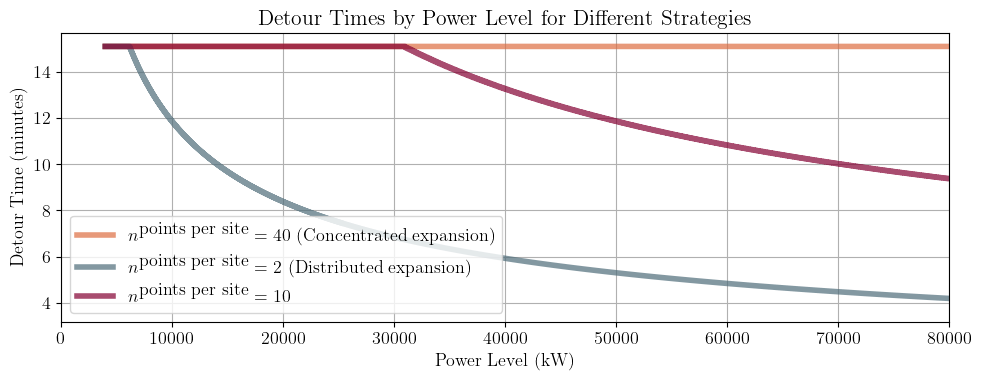

In [49]:
plt.figure(figsize=(10, 4))
colors={'distributed expansion':'#4f6d7a', 'concentrated expansion': '#dd6e42', 'balanced expansion':'#840032'}
step_sizes = {'distributed expansion': 3, 'concentrated expansion': 1, 'balanced expansion': 2}
labels = {'distributed expansion': r'$n^{\textrm{points per site}} = 2$ (Distributed expansion)', 'concentrated expansion': r'$n^{\textrm{points per site}} = 40$ (Concentrated expansion)', 'balanced expansion': r'$n^{\textrm{points per site}} = 10$'}
# Plot detour times for different strategies
for strategy in output.keys():
    x_values, y_values = output[strategy]["power_levels"], output[strategy]["detour_times"]
    print(x_values)
    print(y_values)
    plt.plot(x_values, y_values, label=labels[strategy], color = colors[strategy], linewidth=4, alpha=0.7)

# plt.axhline(y=5, color='gray', linestyle='--', linewidth=3, label='Threshold (5 min)', alpha=0.6)
# plt.axvline(x=60000, color='#81b29a', linestyle='-.', linewidth=3, label='Power Level (60,000 kW)', alpha=0.5)
plt.xlabel('Power Level (kW)')
plt.ylabel('Detour Time (minutes)')
plt.title('Detour Times by Power Level for Different Strategies')
plt.xlim(0, 80000)
plt.legend(loc='lower left')
plt.tight_layout()
plt.grid(True)
plt.savefig('detour_times_by_power_level.png', transparent=True)
plt.show()

running this for each
    - ES211, ES212, ES213 / area
    - fast vs. slow 
    - ratio between fast and slow 





    

In [50]:
# nb_points_per_site_average, area, current_number_cs, current_power, average_power, max_power, current_nb_cs

areas_nuts2 = {
    "ES211": 3037,
    "ES212": 1997,
    "ES213": 2217,
}
spanish_pop = 48350000
share_of_spain_vehs = {
    "ES211": 331648/spanish_pop,
    "ES212": 726712/spanish_pop,
    "ES213": 1153282/spanish_pop,
}
spain_public_AC_cp_2023 = 24931
spain_public_DC_cp_2023 = 5454
spain_public_AC_cp_2020 = 4591
spain_public_DC_cp_2020 = 1439
nb_vehs_2020 = 43203

power_slow = 22
power_fast = 50

ratio_2020_AC_DC = spain_public_AC_cp_2020 / spain_public_DC_cp_2020
ratio_2023_AC_DC = spain_public_AC_cp_2023 / spain_public_DC_cp_2023

cp_ratio_2020 = (spain_public_AC_cp_2020 + spain_public_DC_cp_2020) / nb_vehs_2020
curr_nb_cp_per_station = 2 * 2

print(ratio_2023_AC_DC)

4.571140447378071


In [51]:
output = {}
colors={'distributed expansion':'#4f6d7a', 'concentrated expansion': '#dd6e42', 'balanced expansion':'#840032'}
step_sizes = {'distributed expansion': 30, 'concentrated expansion': 2, 'balanced expansion': 10}
labels = {'distributed expansion': r'$n^{\textrm{points per site}} = 2$ (Distributed expansion)', 'concentrated expansion': r'$n^{\textrm{points per site}} = 40$ (Concentrated expansion)', 'balanced expansion': r'$n^{\textrm{points per site}} = 10$'}

for region in areas_nuts2.keys():
    area = areas_nuts2[region]
    output[region] = {}
    for charging_speed in ["slow", "fast"]:
        if charging_speed == "slow":
            power = power_slow
            curr_cp = spain_public_AC_cp_2020 * share_of_spain_vehs[region]
        else:
            power = power_fast
            curr_cp = spain_public_DC_cp_2020 * share_of_spain_vehs[region]
        current_power = curr_cp * power
        output[region][charging_speed] = {}
        for strategy in step_sizes.keys():
            detour_distances, detour_times, power_levels, detour_times_dic, nb_sites_list = decreasing_detouring_time_by_area(step_sizes[strategy], area, curr_cp/curr_nb_cp_per_station, current_power, power, curr_cp)
            output[region][charging_speed][strategy] = {"detour_distances": detour_distances, "detour_times": detour_times, "power_levels": power_levels, "detour_times_dic": detour_times_dic, "nb_sites_list": nb_sites_list}

[       0       10       20 ... 49999970 49999980 49999990]
[33.25682816 33.25682816 33.25682816 ...  0.67274471  0.67274471
  0.67274471]
[       0       10       20 ... 49999970 49999980 49999990]
[33.25682816 33.25682816 33.25682816 ...  0.1737014   0.17370132
  0.17370132]
[       0       10       20 ... 49999970 49999980 49999990]
[33.25682816 33.25682816 33.25682816 ...  0.38840848  0.38840848
  0.38840848]


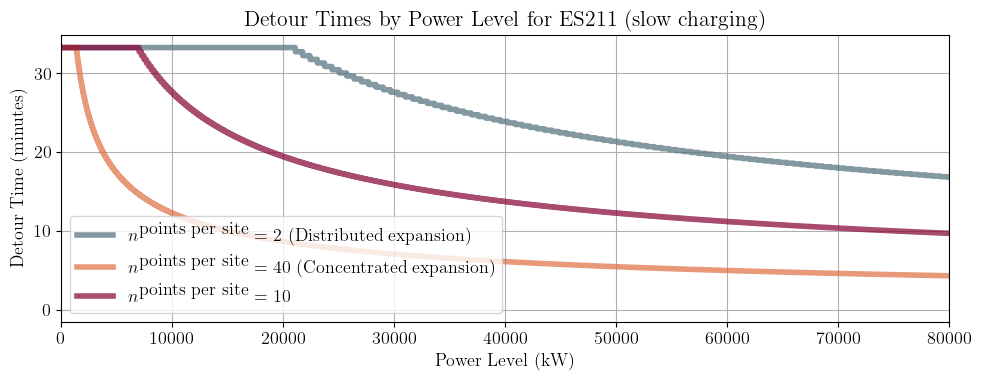

[       0       10       20 ... 49999970 49999980 49999990]
[61.72206089 61.72206089 61.72206089 ...  1.01420202  1.01420202
  1.01420202]
[       0       10       20 ... 49999970 49999980 49999990]
[61.72206089 61.72206089 61.72206089 ...  0.26186479  0.26186479
  0.26186479]
[       0       10       20 ... 49999970 49999980 49999990]
[61.72206089 61.72206089 61.72206089 ...  0.58554981  0.58554981
  0.58554981]


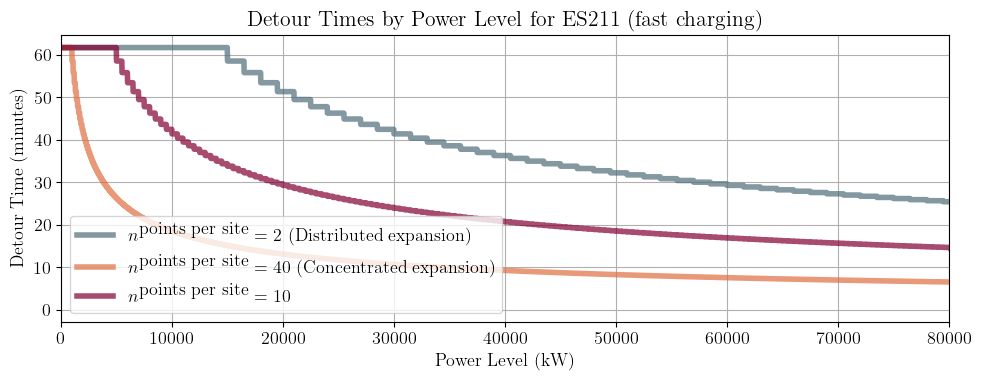

[       0       10       20 ... 49999970 49999980 49999990]
[18.07605959 18.07605959 18.07605959 ...  0.54552785  0.54552785
  0.54552785]
[       0       10       20 ... 49999970 49999980 49999990]
[18.07605959 18.07605959 18.07605959 ...  0.14085425  0.14085419
  0.14085419]
[       0       10       20 ... 49999970 49999980 49999990]
[18.07605959 18.07605959 18.07605959 ...  0.31495996  0.31495996
  0.31495996]


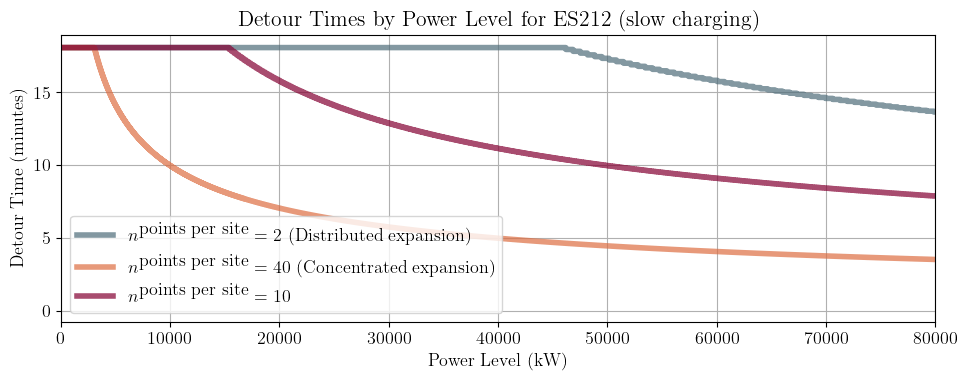

[       0       10       20 ... 49999970 49999980 49999990]
[32.76564054 32.76564054 32.76564054 ...  0.82241516  0.82241516
  0.82241516]
[       0       10       20 ... 49999970 49999980 49999990]
[32.76564054 32.76564054 32.76564054 ...  0.21234583  0.21234583
  0.21234583]
[       0       10       20 ... 49999970 49999980 49999990]
[32.76564054 32.76564054 32.76564054 ...  0.47482162  0.47482162
  0.47482162]


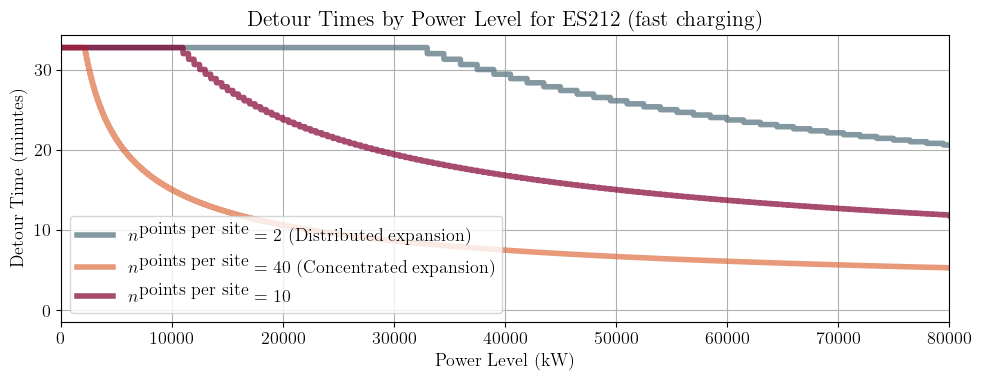

[       0       10       20 ... 49999970 49999980 49999990]
[15.1533577  15.1533577  15.1533577  ...  0.57479203  0.57479203
  0.57479203]
[       0       10       20 ... 49999970 49999980 49999990]
[15.1533577  15.1533577  15.1533577  ...  0.14841021  0.14841014
  0.14841014]
[       0       10       20 ... 49999970 49999980 49999990]
[15.1533577 15.1533577 15.1533577 ...  0.3318556  0.3318556  0.3318556]


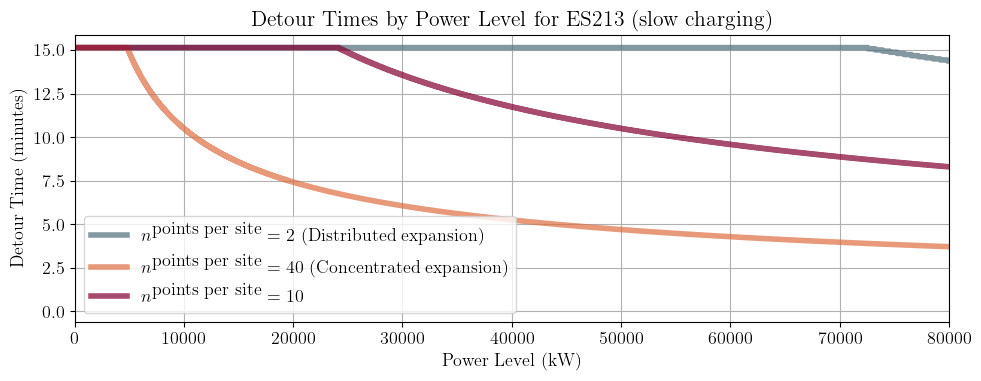

[       0       10       20 ... 49999970 49999980 49999990]
[27.13205354 27.13205354 27.13205354 ...  0.86653263  0.86653263
  0.86653263]
[       0       10       20 ... 49999970 49999980 49999990]
[27.13205354 27.13205354 27.13205354 ...  0.22373687  0.22373687
  0.22373687]
[       0       10       20 ... 49999970 49999980 49999990]
[27.13205354 27.13205354 27.13205354 ...  0.50029285  0.50029285
  0.50029285]


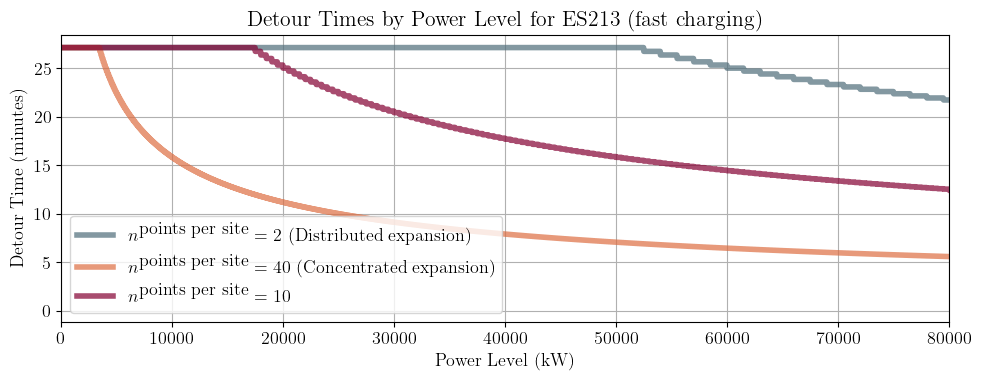

In [52]:
colors={'distributed expansion':'#4f6d7a', 'concentrated expansion': '#dd6e42', 'balanced expansion':'#840032'}
step_sizes = {'distributed expansion': 2, 'concentrated expansion': 40, 'balanced expansion': 10}
labels = {'distributed expansion': r'$n^{\textrm{points per site}} = 2$ (Distributed expansion)', 'concentrated expansion': r'$n^{\textrm{points per site}} = 40$ (Concentrated expansion)', 'balanced expansion': r'$n^{\textrm{points per site}} = 10$'}

for region in output.keys():
    output_for_region = output[region]
    colors={'distributed expansion':'#4f6d7a', 'concentrated expansion': '#dd6e42', 'balanced expansion':'#840032'}
    labels = {'distributed expansion': r'$n^{\textrm{points per site}} = 2$ (Distributed expansion)', 'concentrated expansion': r'$n^{\textrm{points per site}} = 40$ (Concentrated expansion)', 'balanced expansion': r'$n^{\textrm{points per site}} = 10$'}
    # Plot detour times for different strategies
    for speed in ["slow", "fast"]:

        output_for_region_speed = output_for_region[speed]
        plt.figure(figsize=(10, 4))
        for strategy in output_for_region_speed.keys():
            x_values = np.array(output_for_region_speed[strategy]["power_levels"]) 
            y_values = np.array(output_for_region_speed[strategy]["detour_times"])
            print(x_values)
            print(y_values)
            plt.plot(x_values, y_values, label=labels[strategy], color = colors[strategy], linewidth=4, alpha=0.7)

    # plt.axhline(y=5, color='gray', linestyle='--', linewidth=3, label='Threshold (5 min)', alpha=0.6)
    # plt.axvline(x=60000, color='#81b29a', linestyle='-.', linewidth=3, label='Power Level (60,000 kW)', alpha=0.5)
        plt.xlabel('Power Level (kW)')
        plt.ylabel('Detour Time (minutes)')
        plt.title('Detour Times by Power Level for ' + region + ' (' + speed + ' charging)') 
        plt.xlim(0, 80000)
        plt.legend(loc='lower left')
        plt.tight_layout()
        plt.grid(True)
        plt.savefig('detour_times_by_power_level'+region+'.png', transparent=True)
        plt.show()

In [53]:
# ONE REGION

output = {}
colors={'distributed expansion':'#4f6d7a', 'concentrated expansion': '#dd6e42', 'balanced expansion':'#840032'}
step_sizes = {'distributed expansion': 2, 'concentrated expansion': 40, 'balanced expansion': 10}
labels = {'distributed expansion': r'$n^{\textrm{points per site}} = 2$ (Distributed expansion)', 'concentrated expansion': r'$n^{\textrm{points per site}} = 40$ (Concentrated expansion)', 'balanced expansion': r'$n^{\textrm{points per site}} = 10$'}

area = sum(areas_nuts2.values())
output = {}
for charging_speed in ["slow", "fast"]:
    if charging_speed == "slow":
        power = power_slow
        curr_cp = spain_public_AC_cp_2020 * np.average(list(share_of_spain_vehs.values()))
    else:
        power = power_fast
        curr_cp = spain_public_DC_cp_2020 * np.average(list(share_of_spain_vehs.values()))
    current_power = curr_cp * power
    output[charging_speed] = {}
    for strategy in step_sizes.keys():
        detour_distances, detour_times, power_levels, detour_times_dic, nb_sites_list = decreasing_detouring_time_by_area(step_sizes[strategy], area, curr_cp/curr_nb_cp_per_station, current_power, power, curr_cp)
        output[charging_speed][strategy] = {"detour_distances": detour_distances, "detour_times": detour_times, "power_levels": power_levels, "detour_times_dic": detour_times_dic, "nb_sites_list": nb_sites_list}

In [54]:
# saving initital values and charging infrastructure 
data = []
strategy = "distributed expansion"
# for region in output.keys():
for speed in ["slow", "fast"]:
    output_for_region_speed = output[speed]
    data.append(
            {
                "region": "ES21",
                "charging_speed": speed,
                "init_detour_time (min)": output_for_region_speed[strategy]["detour_times"][0],
                "init_installed_power (kW)": output_for_region_speed[strategy]["power_levels"][0],
            }
        )
        
df = pd.DataFrame(data)
df.to_csv("charging_infrastructure.csv", index=False)

[       0       10       20 ... 49999970 49999980 49999990]
[34.19709461 34.19709461 34.19709461 ...  0.26839837  0.26839825
  0.26839825]
[       0       10       20 ... 49999970 49999980 49999990]
[34.19709461 34.19709461 34.19709461 ...  1.20031507  1.20031507
  1.20031507]
[       0       10       20 ... 49999970 49999980 49999990]
[34.19709461 34.19709461 34.19709461 ...  0.60015754  0.60015754
  0.60015754]


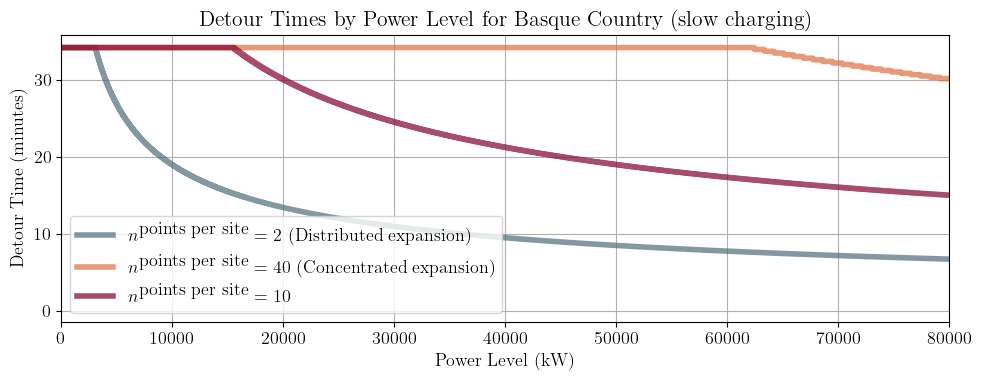

[       0       10       20 ... 49999970 49999980 49999990]
[62.43506707 62.43506707 62.43506707 ...  0.40462588  0.40462588
  0.40462588]
[       0       10       20 ... 49999970 49999980 49999990]
[62.43506707 62.43506707 62.43506707 ...  1.80957635  1.80957635
  1.80957635]
[       0       10       20 ... 49999970 49999980 49999990]
[62.43506707 62.43506707 62.43506707 ...  0.9047746   0.9047746
  0.9047746 ]


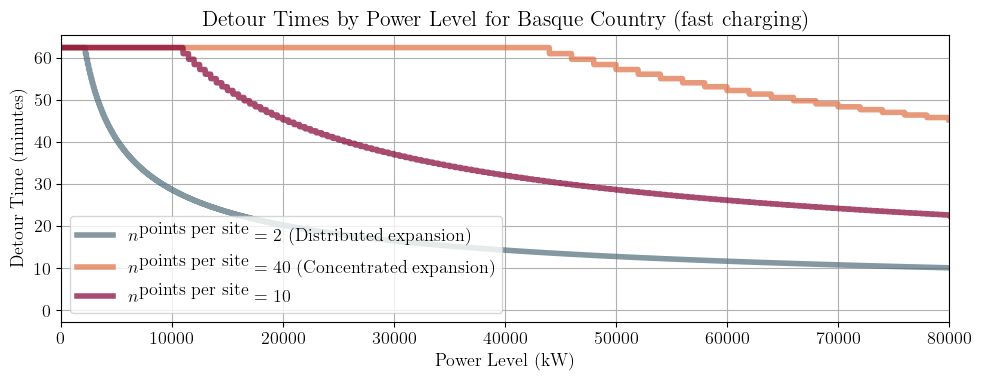

In [55]:
colors={'distributed expansion':'#4f6d7a', 'concentrated expansion': '#dd6e42', 'balanced expansion':'#840032'}
step_sizes = {'distributed expansion': 2, 'concentrated expansion': 40, 'balanced expansion': 10}
labels = {'distributed expansion': r'$n^{\textrm{points per site}} = 2$ (Distributed expansion)', 'concentrated expansion': r'$n^{\textrm{points per site}} = 40$ (Concentrated expansion)', 'balanced expansion': r'$n^{\textrm{points per site}} = 10$'}

output_for_region = output
colors={'distributed expansion':'#4f6d7a', 'concentrated expansion': '#dd6e42', 'balanced expansion':'#840032'}
labels = {'distributed expansion': r'$n^{\textrm{points per site}} = 2$ (Distributed expansion)', 'concentrated expansion': r'$n^{\textrm{points per site}} = 40$ (Concentrated expansion)', 'balanced expansion': r'$n^{\textrm{points per site}} = 10$'}
# Plot detour times for different strategies
for speed in ["slow", "fast"]:

    output_for_region_speed = output_for_region[speed]
    plt.figure(figsize=(10, 4))
    for strategy in output_for_region_speed.keys():
        x_values = np.array(output_for_region_speed[strategy]["power_levels"]) 
        y_values = np.array(output_for_region_speed[strategy]["detour_times"])
        print(x_values)
        print(y_values)
        plt.plot(x_values, y_values, label=labels[strategy], color = colors[strategy], linewidth=4, alpha=0.7)

# plt.axhline(y=5, color='gray', linestyle='--', linewidth=3, label='Threshold (5 min)', alpha=0.6)
# plt.axvline(x=60000, color='#81b29a', linestyle='-.', linewidth=3, label='Power Level (60,000 kW)', alpha=0.5)
    plt.xlabel('Power Level (kW)')
    plt.ylabel('Detour Time (minutes)')
    plt.title('Detour Times by Power Level for ' + "Basque Country" + ' (' + speed + ' charging)') 
    plt.xlim(0, 80000)
    plt.legend(loc='lower left')
    plt.tight_layout()
    plt.grid(True)
    plt.savefig('detour_times_by_power_level_basque_country'+speed+'.png', transparent=True)
    plt.show()

In [1]:
# defining steps per region and mode

steps = [(i, i + 500000) for i in range(0, 50000000, 500000)]

maximal_total_power = 50000000
strategies = []
lb = []
ub = []
reduction = []
regions = []
charging_speed = []
resulting_min = []
output_for_region = output
for speed in ["slow", "fast"]:
    output_for_region_speed = output_for_region[speed]
    for strategy in output_for_region_speed.keys():
        detour_times_dic = output_for_region_speed[strategy]["detour_times_dic"]
        current_power = output_for_region_speed[strategy]["power_levels"][0]
        for step in steps:
            lb.append(step[0])
            ub.append(step[1])
            lower_value = step[0]
            upper_value = step[1]
            if upper_value > maximal_total_power:
                upper_value = maximal_total_power
            print(detour_times_dic.keys())
            average_detour_time = (detour_times_dic[lower_value] + detour_times_dic[upper_value]) / 2
            print(lower_value, upper_value, average_detour_time, detour_times_dic[lower_value], detour_times_dic[upper_value])

            reduction_value = (detour_times_dic[current_power] - average_detour_time) / detour_times_dic[current_power]
            reduction.append(reduction_value)
            regions.append(region)
            strategies.append(strategy)
            charging_speed.append(speed)
            resulting_min.append(average_detour_time)


df = pd.DataFrame({"charging_speed": charging_speed, "strategy": strategies, "lower_bound": lb, "upper_bound": ub, "reduction": reduction, "resulting_min": resulting_min})

# dropping zero values 
df = df[df["reduction"] != 0]
df = df[df["resulting_min"] >= 5]


df.to_csv('reduction_values_speed_strategy_ONENODE.csv', index=False)
print(detour_time_init)

NameError: name 'output' is not defined

In [ ]:

steps_of_reduction = {
    "distributed expansion": [(5000, 15000), (15000, 20000), (20000, 30000), (30000, 1000000)],
    "balanced expansion": [(30000, 45000), (45000, 1000000)],
}

maximal_total_power = 60000
strategies = []
lb = []
ub = []
reduction = []
for strategy in steps_of_reduction.keys():
    for step in steps_of_reduction[strategy]:
        detour_times_dic = output[strategy]["detour_times_dic"]
        strategies.append(strategy)
        lb.append(step[0])
        ub.append(step[1])
        lower_value = step[0]
        upper_value = step[1]
        if upper_value > maximal_total_power:
            upper_value = maximal_total_power
        average_detour_time = (detour_times_dic[lower_value] + detour_times_dic[upper_value]) / 2
        print(lower_value, upper_value, average_detour_time, detour_times_dic[lower_value], detour_times_dic[upper_value])

        reduction_value = (detour_times_dic[current_power] - average_detour_time) / detour_times_dic[current_power]
        reduction.append(reduction_value)

df = pd.DataFrame({"strategy": strategies, "lower_bound": lb, "upper_bound": ub, "reduction": reduction})

df.to_csv('reduction_values.csv', index=False)
print(detour_time_init)


KeyError: 'distributed expansion'

In [ ]:
print(output.keys())
o = output["balanced expansion"]
print(o.keys())

for p in o["detour_times"]:
    print(p)
# output[strategy]

In [ ]:
historical_expansion = {2020: 6000, 2021: 8900, 2022: 21000, 2023: 30000, 2030: 130000}

points_2023 = 530

ratio = points_2023 / historical_expansion[2023]

points_basque_country = {key: int(value * ratio) for key, value in historical_expansion.items()}


plt.figure(figsize=(10, 4))
plt.bar(points_basque_country.keys(), points_basque_country.values(), color='skyblue',zorder=2)
plt.xlabel('Year')
plt.grid()
plt.ylabel('Number of Charging Points')
plt.title('Expansion of Charging Points in Basque Country')
print(points_basque_country)

In [ ]:
share_spain_EU_target = (30/630) * 3000000
print(share_spain_EU_target)

Gompertz fit → K = 281180, b = 0.160, t0 = 8.38


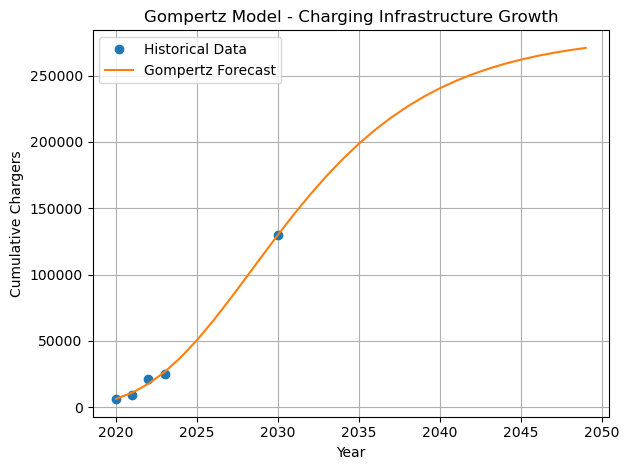

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Define Gompertz function
def gompertz(t, K, b, t0):
    return K * np.exp(-np.exp(-b * (t - t0)))

# Your data
years = np.array([2020, 2021, 2022, 2023, 2030])
chargers = np.array([6000, 8900, 21000, 25000, 130000])
t = years - years[0]  # Normalize time

# Initial guesses: [K, b, t0]
initial_guess = [120000, 1, 2]  # Max 50k chargers, growth around year 2 (~2022)

# Fit Gompertz model
params, _ = curve_fit(gompertz, t, chargers, p0=initial_guess, maxfev=10000)
K, b, t0 = params
print(f"Gompertz fit → K = {int(K)}, b = {b:.3f}, t0 = {t0:.2f}")

# Forecast
t_future = np.arange(0, 30)
forecast = gompertz(t_future, K, b, t0)

# Plot
plt.plot(years, chargers, 'o', label='Historical Data')
plt.plot(years[0] + t_future, forecast, '-', label='Gompertz Forecast')
plt.title('Gompertz Model - Charging Infrastructure Growth')
plt.xlabel('Year')
plt.ylabel('Cumulative Chargers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Gompertz fit → K = 3798, b = 0.191, t0 = 6.40
Gompertz fit → K = 1951, b = 0.266, t0 = 3.84
Gompertz fit → K = 7456, b = 0.148, t0 = 9.41
Linear regression: y = 12978.03 * year + -26218961.15


NameError: name 'ratio' is not defined

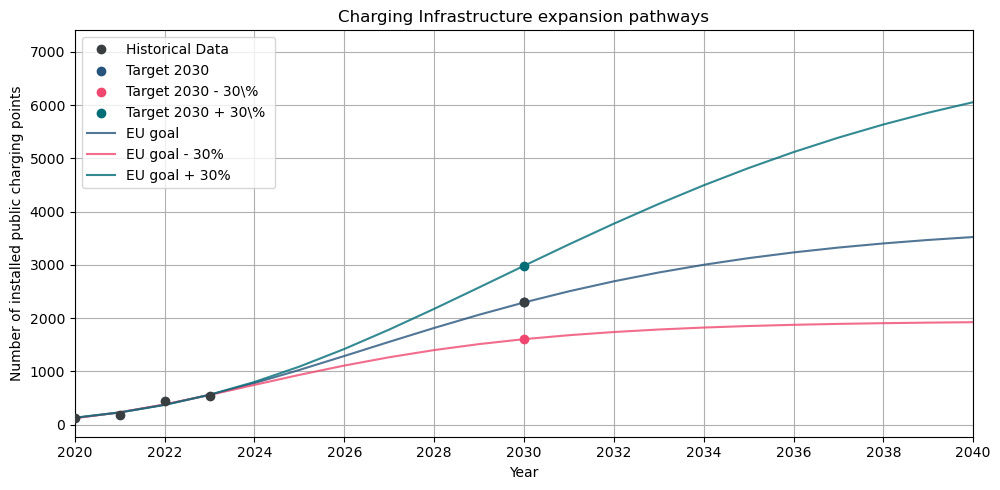

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Your data{2020: 127, 2021: 188, 2022: 445, 2023: 530}

years = np.array([2020, 2021, 2022, 2023, 2030])
chargers_3 = np.array([127, 188, 445, 530, 2296*(1+0.3)])
chargers_2 = np.array([127, 188, 445, 530, 2296*(1-0.3)])
chargers_1 = np.array([127, 188, 445, 530, 2296])
# Reshape years for sklearn
X = years.reshape(-1, 1)
y = chargers


t = years - years[0]  # Normalize time

# Initial guesses: [K, b, t0]
initial_guess = [120000, 1, 2]  # Max 50k chargers, growth around year 2 (~2022)

# Fit Gompertz model
params1, _ = curve_fit(gompertz, t, chargers_1, p0=initial_guess, maxfev=10000)
K, b, t0 = params1
print(f"Gompertz fit → K = {int(K)}, b = {b:.3f}, t0 = {t0:.2f}")

# Forecast
t_future = np.arange(0, 30)
forecast_1 = gompertz(t_future, K, b, t0)



params2, _ = curve_fit(gompertz, t, chargers_2, p0=initial_guess, maxfev=10000)
K, b, t0 = params2
print(f"Gompertz fit → K = {int(K)}, b = {b:.3f}, t0 = {t0:.2f}")

# Forecast
t_future = np.arange(0, 30)
forecast_2 = gompertz(t_future, K, b, t0)



params3, _ = curve_fit(gompertz, t, chargers_3, p0=initial_guess, maxfev=10000)
K, b, t0 = params3
print(f"Gompertz fit → K = {int(K)}, b = {b:.3f}, t0 = {t0:.2f}")

# Forecast
t_future = np.arange(0, 30)
forecast_3 = gompertz(t_future, K, b, t0)




# Fit linear regression
model = LinearRegression()
model.fit(X, y)

# Get parameters
slope = model.coef_[0]
intercept = model.intercept_
print(f"Linear regression: y = {slope:.2f} * year + {intercept:.2f}")

# Predict future
future_years = np.arange(2020, 2040).reshape(-1, 1)
predictions = model.predict(future_years)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(years, chargers_1, 'o', label='Historical Data', color="#393e41", zorder=10)
plt.scatter([2030], [2296], color='#26547c', label='Target 2030', zorder=3)
plt.scatter([2030], [2296*(1-0.30)], color='#ef476f', label=r'Target 2030 - 30\% ', zorder=3)
plt.scatter([2030], [2296*(1+0.30)], color='#006d77', label=r'Target 2030 + 30\% ', zorder=3)
#plt.plot(future_years, predictions, '-', label='Linear Regression')
plt.plot(years[0] + t_future, forecast_1, '-', label='EU goal', color="#26547c", alpha=0.8)
plt.plot(years[0] + t_future, forecast_2, '-', label='EU goal - 30%', color="#ef476f",alpha=0.8)
plt.plot(years[0] + t_future, forecast_3, '-', label='EU goal + 30%', color="#006d77", alpha=0.8)
plt.title('Charging Infrastructure expansion pathways')
plt.xlabel('Year')
plt.ylabel('Number of installed public charging points')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xlim(2020, 2040)
plt.xticks(np.arange(2020, 2041, 2))  # Set x-ticks to full year values with a step of 2 years
print(150000 * ratio)
plt.savefig('charging_infrastructure_expansion_pathways.png', dpi=300, transparent=True)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

historical_expansion = {2020: 63800 ,2021: 84700, 2022: 114289, 2023: 145000}
ratio = 533 / historical_expansion[2023]
points_basque_country = {key: int(value * ratio) for key, value in historical_expansion.items()}
# Your data
years = np.array([2020, 2021, 2022, 2023])
chargers = np.array([points_basque_country[y] for y in years])
print(chargers)
# Reshape years for sklearn
X = years.reshape(-1, 1)
y = chargers

# Fit linear regression
model = LinearRegression()
model.fit(X, y)

# Get parameters
slope = model.coef_[0]
intercept = model.intercept_
print(f"Linear regression: y = {slope:.2f} * year + {intercept:.2f}")

# Predict future
future_years = np.arange(2020, 2050).reshape(-1, 1)
predictions = model.predict(future_years)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(years, chargers, 'o', label='Historical Data')
plt.plot(future_years, predictions, '-', label='Linear Regression')
plt.title('Linear Regression - Charging Infrastructure')
plt.xlabel('Year')
plt.ylabel('Cumulative Chargers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
bev_spain = 150000
cars_spain =26 * 10**6
print(bev_spain / cars_spain)